In [3]:
# Pyton Package Installation

## virtual environment setup
%pip install conda

## nlp libraries
%pip install --upgrade gensim
%pip install top2vec

## machine learning libraries
%pip install transformers
%pip install torch

## visualization libraries
%pip install matplotlib
%pip install seaborn
%pip install pyldavis
%pip install cartopy

## datahandling libraries
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Bibliotheken

In [4]:
# Data handling
import csv
import pandas as pd

# NLP-Pipeline
import nltk 
import sklearn
import gensim
# import spaCy as sp
import re

# ML
import transformers
import torch 

## Embeddings

import top2vec as t2v 

## Visualisierung
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
import pyLDAvis
import cartopy as ctp

# Sortieren
import venv
import numpy as np



# Explorative Datenanalyse (EDA)

# Datenstrukturanalyse

In [ ]:
# Datenstrukturanalyse
import pandas as pd
import csv

df1 = pd.read_csv('/Users/kaiweber/Documents/GitHub/DLBDSEDA02_Projekt_Advanced-Data-Analysis/src/complaints_data.csv')
df1.head(10)


,author,posted_on,rating,text
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...
5,"Terri of Mobile, AL","Nov. 9, 2016",1,Thank God. I am changing to Dish. They gave me...
6,"Kellie of Salt Lake City, UT","Nov. 9, 2016",1,I Have been a long time customer and only have...
7,"Kathleen of New Haven, CT","Nov. 6, 2016",2,There is a malfunction on the DVR manager whic...
8,"Shira of Bloomfield, NJ","Nov. 5, 2016",1,Charges overwhelming. Comcast service rep was ...
9,"Kristy of Alpharetta, GA","Nov. 2, 2016",1,"I have had cable, DISH, and U-verse, etc. in t..."


## unstrukturierte Daten
### Duplikaterkennung

In [6]:
len(df1)

5659

In [7]:
# CSV laden
df2 = pd.read_csv('/Users/kaiweber/Documents/GitHub/DLBDSEDA02_Projekt_Advanced-Data-Analysis/src/complaints_data.csv')

# Doppelte Zeilen entfernen (erste behalten)
df2 = df2.drop_duplicates(subset=None, keep='first')
## len(df2) zählt alle Zeilen = 5653
len(df2)

5658

### Textlängenvergleich

Textlängen-Statistiken:
count     5628.000000
mean      1239.940121
std       1760.474721
min         35.000000
25%        527.000000
50%        870.000000
75%       1498.000000
max      93136.000000
Name: text_length, dtype: float64


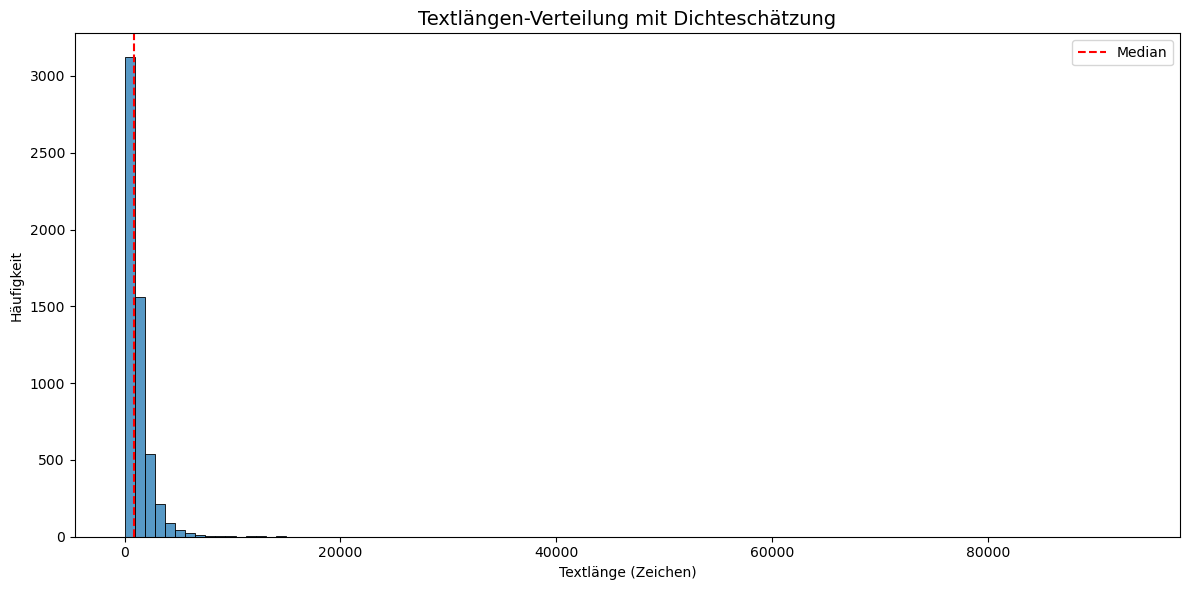

      Bin  Anzahl Prozent
     <100      24    0.4%
  100-500    1253   22.3%
 500-1000    1932   34.3%
1000-1500    1014   18.0%
1500-2000     542    9.6%
2000-2500     320    5.7%
2500-3000     180    3.2%
3000-3500     128    2.3%
    3500+     234    4.2%



In [11]:
# 1. Kopie + Index zurücksetzen von df2
df3 = df2.copy().reset_index(drop=True)

# 2. Länge berechnen
df3['text_length'] = df3['text'].str.len()

# 3. Statistiken
## describe() zeigt nur nicht-leere Werte → Count = 5628 (5653 - 25 NaT)
print("Textlängen-Statistiken:")
print(df3['text_length'].describe())

# 4. Histogramm
plt.figure(figsize=(12, 6))
sns.histplot(data=df3, x='text_length', bins=100)
plt.axvline(df3['text_length'].median(), color='red', linestyle='--', label='Median')
plt.title('Textlängen-Verteilung mit Dichteschätzung', fontsize=14)
plt.xlabel('Textlänge (Zeichen)')
plt.ylabel('Häufigkeit')
plt.legend()
plt.tight_layout()
plt.show()

# 5. Berechnung
total_valid = df3['text_length'].count()  # 5628
## Definieren der Bins und Labels
bins = [0, 100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 90000]
labels = ['<100', '100-500', '500-1000', '1000-1500', '1500-2000', 
          '2000-2500', '2500-3000', '3000-3500', '3500+']

df3['length_bin'] = pd.cut(df3['text_length'], bins=bins, labels=labels, right=False)

## Tabelle mit Häufigkeiten und Prozenten
result = df3['length_bin'].value_counts().sort_index().reset_index()
result.columns = ['Bin', 'Anzahl']
result['Prozent'] = (result['Anzahl'] / total_valid * 100).round(1)
result['Prozent'] = result['Prozent'].astype(str) + '%'
print(result.to_string(index=False))
print()

## strukturierte Daten
Analyse der strukturiert vorliegenden Daten aus den Spalten "author" "posted_on" und "rating".

In [ ]:
### Ortsdatenanalyse
#### Beschwerden nach US-Bundesstaate
##### Bundesstaaten mit Beschwerden
##### Bundesstaaten ohne Beschwerden
### Verteilung der Beschwerden nach den Bundesstaaten
import pandas as pd
df = pd.read_csv('/Users/kaiweber/Documents/GitHub/DLBDSEDA02_Projekt_Advanced-Data-Analysis/src/complaints_data.csv')

#### Extrahieren der Bundesstaaten aus der "author"-Spalte
df["state"] = df["author"].str.extract(r",\s*([A-Z]{2})\s*$", expand=False)

##### State-Codes: alle extrahierten (2 Großbuchstaben am Ende)
all_extracted = df["state"].dropna().unique()

##### gültige State-Codes: US-Bundesstaaten (50 Staaten + DC / 51 Referenz)
all_states_set = {
    "AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA",
    "KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ",
    "NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT",
    "VA","WA","WV","WI","WY","DC"
}
##### ungültige State-Codes
invalid_states = [s for s in all_extracted if s not in all_states_set]
print(f"Bundesstaaten ungültig: {len(invalid_states)} \n{sorted(invalid_states)}\n")


all_states = pd.Series(list(all_states_set))

valid_states_only = df["state"].dropna()
valid_states_only = valid_states_only[valid_states_only.isin(all_states_set)]

#### Beschwerden nach US-Bundesstaaten
##### Bundesstaaten MIT Beschwerden
print(f"Bundesstaaten mit Beschwerden: {len(valid_states_only.value_counts())}")
for state, count in valid_states_only.value_counts().items():
    print(f"{state}: {count}")

##### Bundesstaaten OHNE Beschwerden
missing_states = all_states_set - set(valid_states_only.unique())
print(f"\nBundesstaaten ohne Beschwerden: {len(missing_states)}\n",
    sorted(missing_states), sep='')

print(f"\nKONTROLLE: {len(valid_states_only.value_counts())} + {len(missing_states)} = {len(valid_states_only.value_counts()) + len(missing_states)}")

Bundesstaaten ungültig: 3 
['BC', 'ON', 'PE']

Bundesstaaten mit Beschwerden: 46
FL: 778
CA: 554
GA: 414
IL: 378
PA: 326
NJ: 278
TX: 274
MI: 266
TN: 244
MD: 238
WA: 215
VA: 215
MA: 184
CO: 182
IN: 144
MN: 108
OR: 100
CT: 75
UT: 62
AL: 55
NH: 45
DC: 41
SC: 41
DE: 40
NM: 38
MS: 35
NY: 32
LA: 28
AZ: 22
WV: 21
KY: 21
AR: 19
VT: 12
OH: 12
MO: 12
WI: 9
ME: 7
NC: 7
NV: 5
KS: 4
ID: 2
ND: 2
HI: 2
AK: 1
WY: 1
NE: 1

Bundesstaaten ohne Beschwerden: 5
['IA', 'MT', 'OK', 'RI', 'SD']

KONTROLLE: 46 + 5 = 51


### Zeitdatenanalyse
#### Zeitraum der Beschwerden
#### Verteilung der Beschwerden

In [21]:
### Zeitdatenanalyse
print("===Zeitdatenanalyse===\n")
import pandas as pd
# 1. Datum konvertieren (Format: "Nov. 22, 2016")
df['date'] = pd.to_datetime(df['posted_on'], format='mixed')

### Zeitraum
print("===Zeitraum==")
print(f"Erstes Datum:   {df['date'].min().strftime('%Y-%m-%d')}")
print(f"Letztes Datum:  {df['date'].max().strftime('%Y-%m-%d')}")
total_days = (df['date'].max() - df['date'].min()).days
years = total_days // 365
remaining_days = total_days % 365
print(f"Zeitraum:       {years} Jahre, {remaining_days} Tage ({total_days} Tage)")

### Datum extrahieren
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df['year_month'] = df['date'].dt.to_period('M')

# Monatskategorie für korrekte Sortierung
months_order = pd.date_range(start='2026-01-01', end='2026-12-01', freq='MS').strftime('%B').tolist()
df['month_name'] = pd.Categorical(df['month_name'], categories=months_order, ordered=True)

# DataFrame chronologisch sortieren
df = df.sort_values(['year', 'month']).reset_index(drop=True)

### Verteilung pro Monat
print("\n===Verteilumng der Beschwerden==")
print("\nVerteilung pro Monat:")
print(df['month_name'].value_counts().sort_index())

print("\nVerteilung pro Jahr:")

===Zeitdatenanalyse===

===Zeitraum==
Erstes Datum:   2000-07-31
Letztes Datum:  2016-11-22
Zeitraum:       16 Jahre, 118 Tage (5958 Tage)

===Verteilumng der Beschwerden==

Verteilung pro Monat:
month_name
January      485
February     476
March        441
April        369
May          394
June         461
July         529
August       540
September    507
October      526
November     505
December     426
Name: count, dtype: int64

Verteilung pro Jahr:


### Bewertungsanalyse (engl. rating)
Chi-Quadrattest

===Absolute Verteilung der Bewertungen===
rating
1    3734
0    1560
2     260
3      54
5      32
4      19
Name: count, dtype: int64


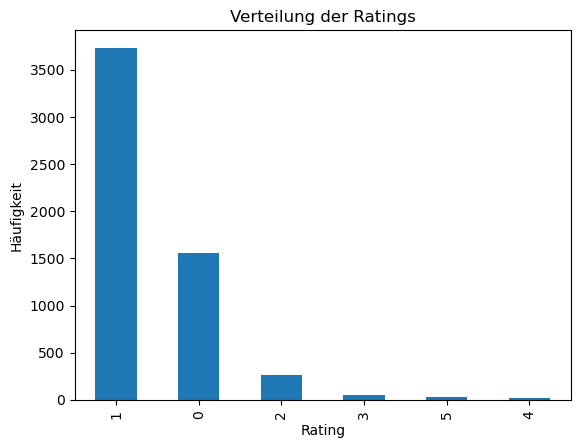

===Relative Verteilung der Bewertungen===
rating
1    65.98%
0    27.57%
2     4.59%
3     0.95%
5     0.57%
4     0.34%
Name: proportion, dtype: object


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/kaiweber/Documents/GitHub/DLBDSEDA02_Projekt_Advanced-Data-Analysis/src/complaints_data.csv')

# Absolute Verteilung
print("===Absolute Verteilung der Bewertungen===")
verteilung = df['rating'].value_counts()
print(verteilung)

# Balkendiagramm der Verteilung
df['rating'].value_counts().plot(kind='bar')
plt.title('Verteilung der Ratings')
plt.xlabel('Rating')
plt.ylabel('Häufigkeit')
plt.show()

# Prozentuale Verteilung
print("===Relative Verteilung der Bewertungen===")
prozente = (df['rating'].value_counts(normalize=True) * 100).round(2).astype(str) + '%'
print(prozente)

### Datensatzbereinigung (engl. dataset cleaning)